In [26]:
#Read in Data
copy = read.csv('Results1/copy.csv')
colnames(copy) <- c("repl", "opt", "bits", "prec", "bw", "time")

#Make factors categorical
copy$opt = factor(copy$opt)
copy$bits = factor(copy$bits)
copy$prec = factor(copy$prec)

#generate linear model
m  = lm(bw ~ opt*bits*prec, data=copy)

#report model
summary(m)


Call:
lm(formula = bw ~ opt * bits * prec, data = copy)

Residuals:
    Min      1Q  Median      3Q     Max 
-480.20  -26.07    4.63   41.02  341.20 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3736.50      97.03  38.509  < 2e-16 ***
opt1              2858.07     125.26  22.816  < 2e-16 ***
opt2              3015.93     125.26  24.077  < 2e-16 ***
opt3              3131.97     125.26  25.003  < 2e-16 ***
bits1            -1715.20     125.26 -13.693 1.09e-14 ***
prec1               27.53     125.26   0.220    0.827    
opt1:bits1        1000.83     168.06   5.955 1.39e-06 ***
opt2:bits1         889.87     168.06   5.295 9.22e-06 ***
opt3:bits1        1794.93     168.06  10.680 6.50e-12 ***
opt1:prec1        -200.50     168.06  -1.193    0.242    
opt2:prec1        -117.60     168.06  -0.700    0.489    
opt3:prec1         -77.07     168.06  -0.459    0.650    
bits1:prec1        -29.77     168.06  -0.177    0.861    
opt1:bits1:prec1   391

In [27]:
#find percentage variation due to each factor
#anova
anova(m)
anova_m1 <- anova(m)

#pct variation
sst = sum(anova(m)$Sum)
pct_var = anova(m)$Sum/sst
#rename columns
anova_m1 <- setNames(cbind(rownames(anova_m1), anova_m1, row.names = NULL), 
         c("factor", "Df", "SumSq", "MeanSq", "FValue", "PR(>F)"))

#put results in table
ff <- data.frame(matrix(pct_var, nrow=1, ncol=8))
colnames(ff) <- anova_m1$factor
attr(ff,"title") <- "Percentage Variation"

#display table
print("Percentage Variation of residuals")
(ff)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
opt,3,116974794,38991598,2070.809,8.78901e-36
bits,1,5748782,5748782,305.3128,1.330499e-17
prec,1,6156.802,6156.802,0.3269824,0.5715649
opt:bits,3,4620638,1540213,81.79933,8.054603e-15
opt:prec,3,40580,13526.67,0.7183894,0.5485766
bits:prec,1,62704.89,62704.89,3.330202,0.07766888
opt:bits:prec,3,118078.5,39359.51,2.090349,0.1217249
Residuals,31,583703.9,18829.16,NA,NA


[1] "Percentage Variation of residuals"


,opt,bits,prec,opt:bits,opt:prec,bits:prec,opt:bits:prec,Residuals
1,0.9127572,0.04485789,4.804168e-05,0.03605495,0.0003166467,0.0004892878,0.0009213696,0.004554656


In [28]:
#find confidence interval for factors
confint(aov(m))

,2.5 %,97.5 %
(Intercept),3538.609,3934.391
opt1,2602.590,3113.543
opt2,2760.457,3271.410
opt3,2876.490,3387.443
bits1,-1970.677,-1459.723
prec1,-227.9434,283.0101
opt1:bits1,658.0753,1343.5914
opt2:bits1,547.1086,1232.6247
opt3:bits1,1452.175,2137.691
opt1:prec1,-543.258,142.258


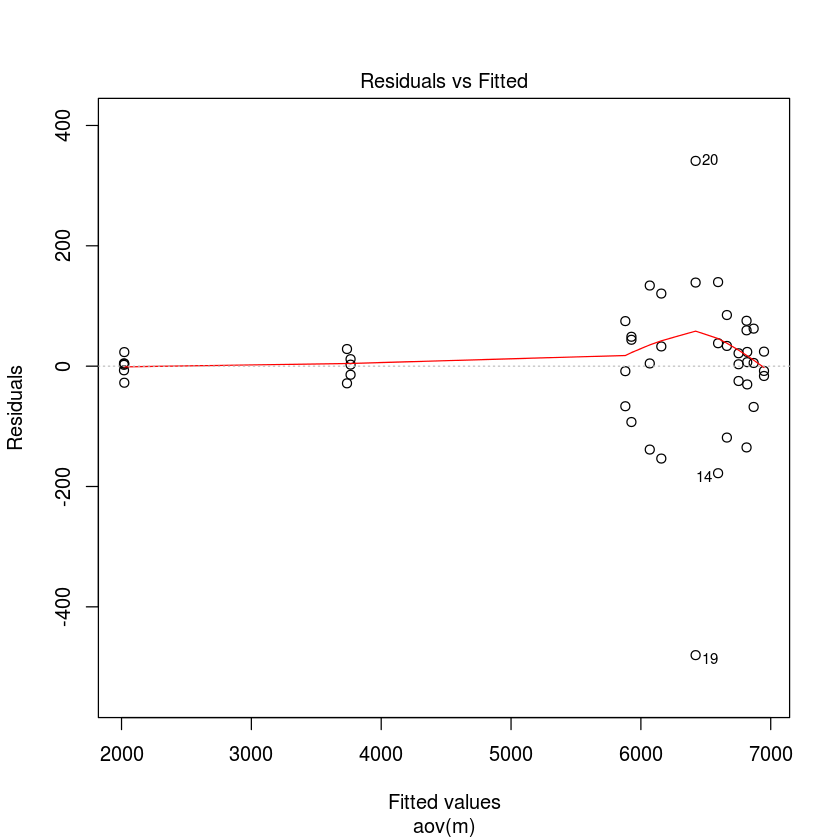

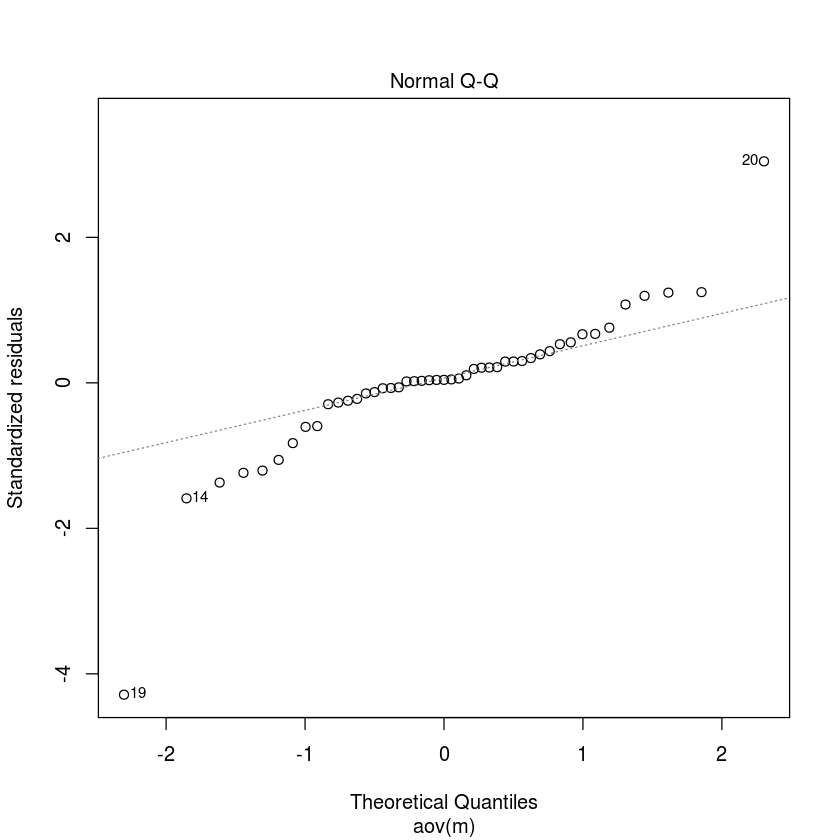

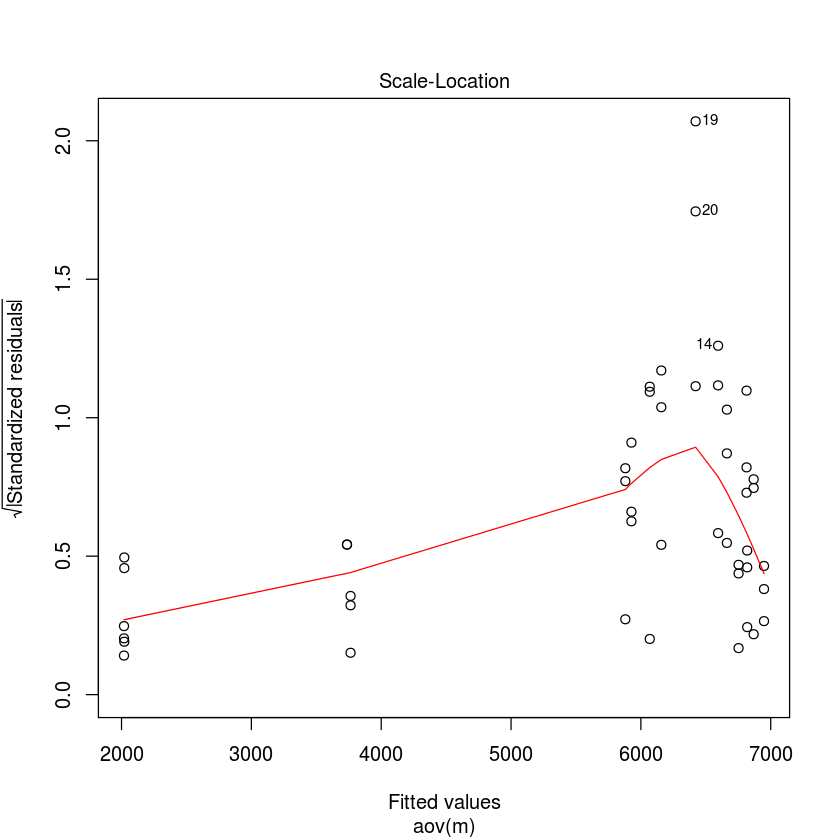

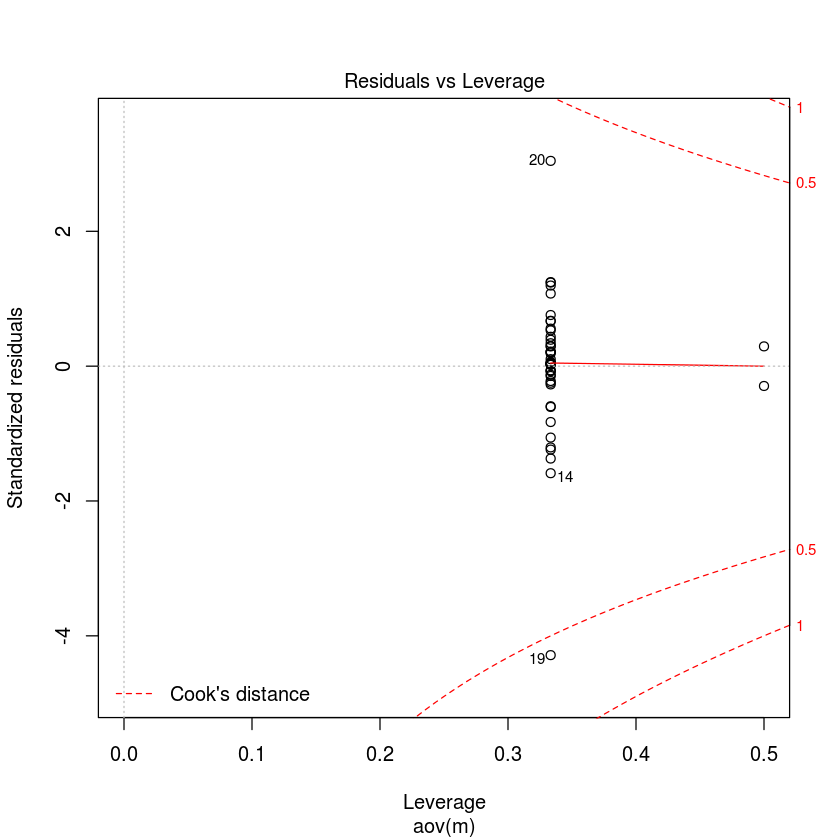

In [29]:
#plot anova stuff
plot(aov(m))

In [30]:
#Read in Data
scale = read.csv('Results1/scale.csv')
colnames(scale) <- c("repl", "opt", "bits", "prec", "bw", "time")

#Make factors categorical
scale$opt = factor(scale$opt)
scale$bits = factor(scale$bits)
scale$prec = factor(scale$prec)

#generate linear model
m2  = lm(bw ~ opt*bits*prec, data=scale)

#report model
summary(m2)

#find percentage variation due to each factor
#anova
anova(m2)
anova_m1 <- anova(m2)

#pct variation
sst = sum(anova(m2)$Sum)
pct_var = anova(m2)$Sum/sst
#rename columns
anova_m1 <- setNames(cbind(rownames(anova_m1), anova_m1, row.names = NULL), 
         c("factor", "Df", "SumSq", "MeanSq", "FValue", "PR(>F)"))

#put results in table
ff2 <- data.frame(matrix(pct_var, nrow=1, ncol=8))
colnames(ff2) <- anova_m1$factor
attr(ff2,"title") <- "Percentage Variation"

#display table
print("Percentage Variation of residuals")
(ff2)

#find confidence interval for factors
confint(aov(m2))


Call:
lm(formula = bw ~ opt * bits * prec, data = scale)

Residuals:
    Min      1Q  Median      3Q     Max 
-403.13  -22.58    3.90   24.23  271.27 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3541.10      73.15  48.408  < 2e-16 ***
opt1              3024.73      94.44  32.029  < 2e-16 ***
opt2              3131.53      94.44  33.160  < 2e-16 ***
opt3              2747.83      94.44  29.097  < 2e-16 ***
bits1            -1557.90      94.44 -16.497  < 2e-16 ***
prec1              127.10      94.44   1.346  0.18811    
opt1:bits1        1077.73     126.70   8.506 1.31e-09 ***
opt2:bits1        1020.53     126.70   8.055 4.28e-09 ***
opt3:bits1        1112.03     126.70   8.777 6.56e-10 ***
opt1:prec1       -1011.30     126.70  -7.982 5.18e-09 ***
opt2:prec1        -209.93     126.70  -1.657  0.10762    
opt3:prec1         393.03     126.70   3.102  0.00408 ** 
bits1:prec1       -110.83     126.70  -0.875  0.38843    
opt1:bits1:prec1   86

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
opt,3,106902477,35634159,3329.653,5.753871e-39
bits,1,4468012,4468012,417.4906,1.517985e-19
prec,1,41512.46,41512.46,3.878921,0.05788837
opt:bits,3,3948694,1316231,122.9885,2.668371e-17
opt:prec,3,2356333,785444.5,73.39186,3.528588e-14
bits:prec,1,177347.9,177347.9,16.57137,0.0002999329
opt:bits:prec,3,376642.8,125547.6,11.73116,2.663032e-05
Residuals,31,331764,10702.06,NA,NA


[1] "Percentage Variation of residuals"


,opt,bits,prec,opt:bits,opt:prec,bits:prec,opt:bits:prec,Residuals
1,0.9013488,0.03767207,0.0003500125,0.03329343,0.01986744,0.00149531,0.003175666,0.00279727


,2.5 %,97.5 %
(Intercept),3391.908,3690.292
opt1,2832.127,3217.339
opt2,2938.927,3324.139
opt3,2555.227,2940.439
bits1,-1750.506,-1365.294
prec1,-65.50597,319.70597
opt1:bits1,819.3253,1336.1414
opt2:bits1,762.1253,1278.9414
opt3:bits1,853.6253,1370.4414
opt1:prec1,-1269.708,-752.892


In [31]:
#Read in Data
triad = read.csv('Results1/triad.csv')
colnames(triad) <- c("repl", "opt", "bits", "prec", "bw", "time")

#Make factors categorical
triad$opt = factor(triad$opt)
triad$bits = factor(triad$bits)
triad$prec = factor(triad$prec)

#generate linear model
m3  = lm(bw ~ opt*bits*prec, data=triad)

#report model
summary(m3)

#find percentage variation due to each factor
#anova
anova(m3)
anova_m1 <- anova(m3)

#pct variation
sst = sum(anova(m3)$Sum)
pct_var = anova(m3)$Sum/sst
#rename columns
anova_m1 <- setNames(cbind(rownames(anova_m1), anova_m1, row.names = NULL), 
         c("factor", "Df", "SumSq", "MeanSq", "FValue", "PR(>F)"))

#put results in table
ff3 <- data.frame(matrix(pct_var, nrow=1, ncol=8))
colnames(ff3) <- anova_m1$factor
attr(ff3,"title") <- "Percentage Variation"

#display table
print("Percentage Variation of residuals")
(ff3)

#find confidence interval for factors
confint(aov(m3))


Call:
lm(formula = bw ~ opt * bits * prec, data = triad)

Residuals:
    Min      1Q  Median      3Q     Max 
-553.77  -22.88    0.47   32.75  286.03 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4357.35     108.17  40.282  < 2e-16 ***
opt1              2498.95     139.65  17.895  < 2e-16 ***
opt2              2596.88     139.65  18.596  < 2e-16 ***
opt3              2560.25     139.65  18.334  < 2e-16 ***
bits1            -1962.25     139.65 -14.052 5.46e-15 ***
prec1               18.75     139.65   0.134   0.8941    
opt1:bits1        1716.35     187.36   9.161 2.49e-10 ***
opt2:bits1        1655.72     187.36   8.837 5.63e-10 ***
opt3:bits1        1752.12     187.36   9.352 1.55e-10 ***
opt1:prec1        -203.18     187.36  -1.084   0.2865    
opt2:prec1        -108.42     187.36  -0.579   0.5670    
opt3:prec1         452.45     187.36   2.415   0.0218 *  
bits1:prec1        -17.48     187.36  -0.093   0.9263    
opt1:bits1:prec1   -4

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
opt,3,106627106,35542369,1518.812,1.043029e-33
bits,1,4784809,4784809,204.4665,3.409104e-15
prec,1,114200,114200,4.880045,0.03468921
opt:bits,3,6352838,2117613,90.49073,2.001725e-15
opt:prec,3,1144162,381387.2,16.2976,1.53687e-06
bits:prec,1,2035.147,2035.147,0.08696679,0.7700353
opt:bits:prec,3,40306.03,13435.34,0.5741249,0.6363148
Residuals,31,725444.3,23401.43,NA,NA


[1] "Percentage Variation of residuals"


,opt,bits,prec,opt:bits,opt:prec,bits:prec,opt:bits:prec,Residuals
1,0.8901102,0.03994301,0.0009533281,0.05303272,0.009551323,1.698916e-05,0.0003364699,0.006055922


,2.5 %,97.5 %
(Intercept),4136.736,4577.964
opt1,2214.139,2783.761
opt2,2312.072,2881.695
opt3,2275.439,2845.061
bits1,-2247.061,-1677.439
prec1,-266.0613,303.5613
opt1:bits1,1334.236,2098.464
opt2:bits1,1273.602,2037.831
opt3:bits1,1370.002,2134.231
opt1:prec1,-585.2977,178.9311


In [32]:
#Read in Data
add = read.csv('Results1/add.csv')
colnames(add) <- c("repl", "opt", "bits", "prec", "bw", "time")

#Make factors categorical
add$opt = factor(add$opt)
add$bits = factor(add$bits)
add$prec = factor(add$prec)

#generate linear model
m4  = lm(bw ~ opt*bits*prec, data=add)

#report model
summary(m4)

#find percentage variation due to each factor
#anova
anova(m4)
anova_m1 <- anova(m4)

#pct variation
sst = sum(anova(m4)$Sum)
pct_var = anova(m4)$Sum/sst
#rename columns
anova_m1 <- setNames(cbind(rownames(anova_m1), anova_m1, row.names = NULL), 
         c("factor", "Df", "SumSq", "MeanSq", "FValue", "PR(>F)"))

#put results in table
ff4 <- data.frame(matrix(pct_var, nrow=1, ncol=8))
colnames(ff4) <- anova_m1$factor
attr(ff4,"title") <- "Percentage Variation"

#display table
print("Percentage Variation of residuals")
(ff4)

#find confidence interval for factors
confint(aov(m4))


Call:
lm(formula = bw ~ opt * bits * prec, data = add)

Residuals:
    Min      1Q  Median      3Q     Max 
-336.43  -37.82    0.43   34.02  373.47 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4381.00      77.07  56.848  < 2e-16 ***
opt1              2851.07      99.49  28.656  < 2e-16 ***
opt2              2606.57      99.49  26.199  < 2e-16 ***
opt3              3012.37      99.49  30.278  < 2e-16 ***
bits1            -1874.00      99.49 -18.836  < 2e-16 ***
prec1               87.53      99.49   0.880 0.385732    
opt1:bits1        1372.80     133.48  10.285 1.63e-11 ***
opt2:bits1        1608.13     133.48  12.048 3.14e-13 ***
opt3:bits1        1263.30     133.48   9.464 1.17e-10 ***
opt1:prec1        -729.47     133.48  -5.465 5.66e-06 ***
opt2:prec1        -165.50     133.48  -1.240 0.224326    
opt3:prec1         -41.17     133.48  -0.308 0.759835    
bits1:prec1       -138.67     133.48  -1.039 0.306911    
opt1:bits1:prec1   728.

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
opt,3,109704484,36568161,3078.601,1.931598e-38
bits,1,5147776,5147776,433.381,8.838441e-20
prec,1,187.1444,187.1444,0.01575531,0.9009223
opt:bits,3,5981314,1993771,167.8516,3.005856e-19
opt:prec,3,569064.7,189688.2,15.96948,1.855803e-06
bits:prec,1,193503.4,193503.4,16.29067,0.000330329
opt:bits:prec,3,232164.6,77388.21,6.51516,0.001514261
Residuals,31,368223.5,11878.18,NA,NA


[1] "Percentage Variation of residuals"


,opt,bits,prec,opt:bits,opt:prec,bits:prec,opt:bits:prec,Residuals
1,0.8977695,0.04212695,1.531501e-06,0.04894824,0.004656956,0.00158354,0.001899925,0.003013366


,2.5 %,97.5 %
(Intercept),4223.824,4538.176
opt1,2648.153,3053.980
opt2,2403.653,2809.480
opt3,2809.453,3215.280
bits1,-2076.913,-1671.087
prec1,-115.3801,290.4468
opt1:bits1,1100.563,1645.037
opt2:bits1,1335.896,1880.370
opt3:bits1,991.063,1535.537
opt1:prec1,-1001.7036,-457.2297


In [45]:
#combine and summarize data

#variation due to factors
total <- rbind(ff, ff2, ff3, ff4)
avg <- c(mean(total$opt), mean(total$bits), mean(total$prec),
         mean(total$'opt:bits'), mean(total$'opt:prec'), mean(total$'bits:prec'),
         mean(total$'opt:bits:prec'), mean(total$Residuals))
total2 <- rbind(total, avg)
row.names(total2) <- c("copy", "scale", "triad", "add", "Average")
total2

,opt,bits,prec,opt:bits,opt:prec,bits:prec,opt:bits:prec,Residuals
copy,0.9127572,0.04485789,4.804168e-05,0.03605495,0.0003166467,0.0004892878,0.0009213696,0.004554656
scale,0.9013488,0.03767207,0.0003500125,0.03329343,0.01986744,0.00149531,0.003175666,0.00279727
triad,0.8901102,0.03994301,0.0009533281,0.05303272,0.009551323,1.698916e-05,0.0003364699,0.006055922
add,0.8977695,0.04212695,1.531501e-06,0.04894824,0.004656956,0.00158354,0.001899925,0.003013366
Average,0.9004964,0.04114998,0.0003382285,0.04283233,0.008598091,0.0008962816,0.001583358,0.004105303
